In [6]:
#%matplotlib widget
from sympy import Symbol, Basic, denom, numer, plot as splot, Eq, Or, plot_implicit, \
                  latex, Rational as R, plot_parametric, I, atan, exp, arg, pi, conjugate, \
                  Piecewise, And, sin, cos, Or, Max, re, im, lambdify, Expr, solve, oo, tan, limit,
                  diff
from sympy.plotting.plot import plot3d_parametric_surface, plot_contour
from functools import partial
from IPython.display import display
from sympy.abc import s, z
from utils import f2zpk, zpk2f, f2nd, splot_multiple, reim
from typeguard import typechecked
smplot = partial(typechecked(splot_multiple), plotf=splot, random_colors=True)
pmplot = partial(typechecked(splot_multiple), plotf=plot_parametric, random_colors=True)
w = Symbol("omega", real=True)
k = Symbol("K", real=True)
# Conexión a lazo cerrado en sustracción
def cls_connect(h: Basic, g: Basic):
    return h / (1+g*h)

IndentationError: unexpected indent (<ipython-input-6-c3ec908c3d5c>, line 5)

In [8]:
G_s = k
H_s = (s+3)/(s*(s-1))
D_s = 1 + G_s * H_s
display(D_s)
limit_abs_tan = lambda expr: 2/pi*atan(abs(expr))*exp(I*arg(expr))
limit_abs_exp = lambda expr: (1-exp(-abs(expr)))*exp(I*arg(expr))
limit_abs_exp = lambda expr: (1-exp(-abs(expr)))*expr/abs(expr)
unlimit_abs_exp = lambda expr: (-ln(1-abs(expr)))*exp(I*arg(expr))

rsemicircle=(Max(cos(w), 0)+I*sin(w))*1
rsemicircle=(cos(w)+I*sin(w))
display(reim(rsemicircle))
display(limit_abs_exp((G_s * H_s).subs(s, rsemicircle)).subs(k, 1))

#lambdified = tuple(map(lambda f: lambdify((w,), f, "numpy"),
#    reim((G_s * H_s).subs(s, rsemicircle).subs(k, 1))))

def nyquist_curve(tf: Expr, s: Symbol, w: Symbol, radius: Basic):
    return tf.subs(s, (Max(cos(w), 0)+I*sin(w))*radius)

def parametric_arrow(expr: Basic, param: Symbol):
    df_dt = expr.diff(param)
    return lambda t: (expr.subs(param, t), df_dt.subs(param, t))

r = Symbol("r", real=True, positive=True)
curve = nyquist_curve(
    limit_abs_exp((G_s * H_s).subs(k, 1))/limit_abs_exp(1),
    s, w, r
)

display(nyquist_curve((G_s * H_s), s, w, r).diff(w))

#plot_implicit(x > 0, x_var=x)

#limit_abs_exp = lambda expr: expr
#pmplot(
#    #(reim(nyquist_curve(limit_abs_exp(s), s, w, 10)), {}),
#    (reim(nyquist_curve(
#        limit_abs_exp((G_s * H_s).subs(k, 1))/limit_abs_exp(1),
#        s, w, 100)
#    ), {}),
#    (reim(nyquist_curve(
#        limit_abs_exp((G_s * H_s).subs(k, 1).subs(s, s + .5))/limit_abs_exp(1),
#        s, w, 100 - 1)
#    ), {}),
#    ((w, 0, 2*pi), None),
#    ylim=(-2,2), xlim=(-2, 2)
#)

#%matplotlib inline
#u = Symbol("u", real=True, positive=True)
#v = Symbol("v", real=True)
#plot3d_parametric_surface(
#    (*reim((G_s * H_s).subs(k, 1).subs(s, tan(u)+I*tan(v))), tan(u), (u, 0, .9*pi/2), (v, -.9*pi/2, .9*pi/2)),
#    #(*reim(tan(u)+I*tan(v)), tan(u), (u, 0, .9*pi/2), (v, -.9*pi/2, .9*pi/2))
#)

#def nyquist_area(tf: Expr, s: Symbol, z: Symbol):
#    return Or(*(s_ + conjugate(s_) > 0 for s_ in solve(tf - z, s)))

#x = Symbol('x', real=True)
#y = Symbol('y', real=True)
#display(nyquist_area((G_s * H_s).subs(k, 1), s, x+I*y))
#func = lambdify((x, y), nyquist_area((G_s * H_s).subs(k, 1), s, x+I*y))
#plot_implicit(func, x_var=x, y_var=y)

#display(solve(Eq(limit_abs_exp(s), z), s))
#pmplot(
#    (reim(rsemicircle*10), {}),
#    ((reim(limit_abs_exp((G_s * H_s).subs(s, rsemicircle)).subs(k, 1))+((w, -pi/2, pi/2),)), {}),
#    legend=False, xlim=(-10, 10), ylim=(-10, 10)
#)

K*(s + 3)/(s*(s - 1)) + 1

(cos(omega), sin(omega))

(1 - exp(-sqrt(sin(omega)**2 + cos(omega)**2 + 6*cos(omega) + 9)/(sqrt(sin(omega)**2 + cos(omega)**2)*sqrt(sin(omega)**2 + cos(omega)**2 - 2*cos(omega) + 1))))*sqrt(sin(omega)**2 + cos(omega)**2)*(I*sin(omega) + cos(omega) + 3)*sqrt(sin(omega)**2 + cos(omega)**2 - 2*cos(omega) + 1)/((I*sin(omega) + cos(omega))*(I*sin(omega) + cos(omega) - 1)*sqrt(sin(omega)**2 + cos(omega)**2 + 6*cos(omega) + 9))

K*(-sin(omega)*Heaviside(cos(omega)) + I*cos(omega))/((I*sin(omega) + Max(0, cos(omega)))*(r*(I*sin(omega) + Max(0, cos(omega))) - 1)) - K*(r*(I*sin(omega) + Max(0, cos(omega))) + 3)*(-sin(omega)*Heaviside(cos(omega)) + I*cos(omega))/((I*sin(omega) + Max(0, cos(omega)))*(r*(I*sin(omega) + Max(0, cos(omega))) - 1)**2) + K*(r*(I*sin(omega) + Max(0, cos(omega))) + 3)*(sin(omega)*Heaviside(cos(omega)) - I*cos(omega))/(r*(I*sin(omega) + Max(0, cos(omega)))**2*(r*(I*sin(omega) + Max(0, cos(omega))) - 1))

(1 - exp(-sqrt(r**2*sin(omega)**2 + r**2*Max(0, cos(omega))**2 + 6*r*Max(0, cos(omega)) + 9)/(r*sqrt(sin(omega)**2 + Max(0, cos(omega))**2)*sqrt(r**2*sin(omega)**2 + r**2*Max(0, cos(omega))**2 - 2*r*Max(0, cos(omega)) + 1))))*(r*(I*sin(omega) + Max(0, cos(omega))) + 3)*sqrt(sin(omega)**2 + Max(0, cos(omega))**2)*sqrt(r**2*sin(omega)**2 + r**2*Max(0, cos(omega))**2 - 2*r*Max(0, cos(omega)) + 1)/((1 - exp(-1))*(I*sin(omega) + Max(0, cos(omega)))*(r*(I*sin(omega) + Max(0, cos(omega))) - 1)*sqrt(r**2*sin(omega)**2 + r**2*Max(0, cos(omega))**2 + 6*r*Max(0, cos(omega)) + 9))

nan

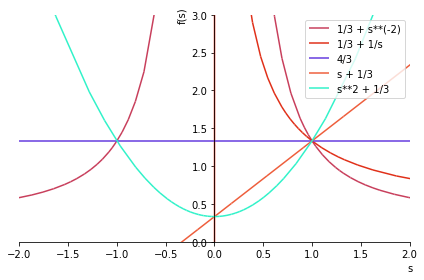

In [3]:
smplot(
    *((s**k + R("1/3"), {}) for k in range (-2, 3)),
    legend=True, xlim=(-2, 2), ylim=(0, 3)
)

In [4]:

from ipywidgets import interact
import ipywidgets as widgets
interact(lambda x: print(x), x=1.0)
widgets.Text(value='Hello World!', disabled=True)

interactive(children=(FloatSlider(value=1.0, description='x', max=3.0, min=-1.0), Output()), _dom_classes=('wi…

Text(value='Hello World!', disabled=True)